Importing libraries


In [1]:
import networkx as nx
from operator import truediv
from scipy.sparse import csr_matrix
import math
import random
from collections import Counter
from itertools import combinations
from collections import defaultdict
from tqdm import tqdm
import pandas as pd
from imblearn.over_sampling import SMOTE

Loading the graphs of Sem-5 and Sem-7

In [2]:
mygraph = nx.read_gml('sem3.gml',label='id')
mygraph1 = nx.read_gml('sem7.gml',label='id')

Storing neccessary metrics for calculating features

In [3]:
e_3=list(mygraph.edges())
L_3=list(mygraph.nodes())
edge_list_3 = list(combinations(L_3, 2))
R1_3=[l[0] for l in edge_list_3]
R2_3=[l[1] for l in edge_list_3]
r1_3 = [lis[0] for lis in e_3]
r2_3 = [lis[1] for lis in e_3]


e_7=list(mygraph1.edges())
L_7=list(mygraph1.nodes())
edge_list_7 = list(combinations(L_7, 2))
R1_7=[l[0] for l in edge_list_7]
R2_7=[l[1] for l in edge_list_7]
r1_7 = [lis[0] for lis in e_7]
r2_7 = [lis[1] for lis in e_7]

G2_3 = nx.DiGraph(mygraph)
G2_7 = nx.DiGraph(mygraph1)
lists=[]

Feature-1: Degree of a node

In [4]:
def DegreeofN(G,l):
    F2=[]
    for i in range(len(G.nodes)):
        a=G.degree[l[i]]
        F2.append(a)
    return F2
F1_3=DegreeofN(mygraph,L_3)
F1_7=DegreeofN(mygraph1,L_7)
lists.append(F1_3)
lists.append(F1_7)

Feature-2: Eigen_centrality

In [5]:
# Networkx appears not to implement their eigenvector centrality algorithm for MultiDiGraph objects, so you'd have to convert your object like:

def Eigen_Centrality(G2):
    centrality = nx.eigenvector_centrality(G2, max_iter=1000)
    return list(centrality.values())
F2_3=Eigen_Centrality(G2_3)
F2_7=Eigen_Centrality(G2_7)
lists.append(F2_3)
lists.append(F2_7)

Feature-3: Betweeness

In [6]:
def Betweeness(G):
    betweeness = nx.betweenness_centrality(G)
    return list(betweeness.values())
F3_3=Betweeness(mygraph)
F3_7 = Betweeness(mygraph1)
lists.append(F3_3)
lists.append(F3_7)

Feature-4: Clustering

In [7]:
def Clustering(G):
    clustering_coeff =nx.clustering(G)
    return list(clustering_coeff.values())
F4_3=Clustering(G2_3)
F4_7=Clustering(G2_7)
lists.append(F4_3)
lists.append(F4_7)

Feature-5: Node Conductivity Betweenness divided by Degree: which nodes can reach the most nodes in the different parts of the network faster with the least connections. Nodes with a high conductivity will tend to be better connected to the different distinct groups of nodes. They are reaching for global connections instead of the local ones.

In [8]:
def nodeConductivity(G,l):
    NC = []
    count=0
    for i in range(0, len(l)):
        if DegreeofN(G,l)[i] == 0:
            NC.append(0)
        else:
            NC.append(Betweeness(G)[i]/DegreeofN(G,l)[i])
        count=count+1
    return NC
F5_3=nodeConductivity(mygraph,L_3)
F5_7=nodeConductivity(mygraph1,L_7)
lists.append(F5_3)
lists.append(F5_7)

Feature-6 Node Locality
Degree squared divided by Betweenness: Local influencers with the least global connections. Nodes with high locality measure will tend to have more connections within their local group of nodes.

In [9]:
def nodeLocality(G,l):
    NL=[]
    for i in range(len(l)):
        count=0
        if DegreeofN(G,l)[i] == 0:
            NL.append(0)
        else:
            temp=math.sqrt(DegreeofN(G,l)[i])
            NL.append(Betweeness(G)[i]/temp)
        count=count+1
    return NL
F6_3=nodeLocality(mygraph,L_3)
F6_7=nodeLocality(mygraph1,L_7)
lists.append(F6_3)
lists.append(F6_7)

Feature-7: No of friends from the same section I am calling the function
Sec_same

In [10]:
def Sec_same(G,l):
    F=[]
    for i in tqdm(range(len(l))):
        G1 = nx.ego_graph(G, l[i], radius=2, center=True, undirected=False, distance=None)
        count = 0  # initialize count outside the inner loop
        for node in list(G1.nodes()):
            if G.nodes[l[i]]['Section'] == G1.nodes[node]['Section']:
                count += 1
        F.append(count)
    return F
F7_3=Sec_same(mygraph,L_3)
F7_7=Sec_same(mygraph1,L_7)
lists.append(F7_3)
lists.append(F7_7)

100%|███████████████████████████████████████████████████████████████████████████████| 128/128 [00:00<00:00, 765.07it/s]


Feature-8: No of friends of same gender in a ego graph of radius 2 I am calling this function Gen_same

In [ ]:
# def Gen_same(G,l):
#     F=[]
#     for i in tqdm(range(len(l))):
#         G1 = nx.ego_graph(G, l[i], radius=2, center=True, undirected=False, distance=None)
#         count = 0  # initialize count outside the inner loop
#         for node in list(G1.nodes()):
#             if G.nodes[l[i]]['Gender'] == G1.nodes[node]['Gender']:
#                 count += 1
#         F.append(count)
#     return F
# F8_3=Gen_same(mygraph,L_3)
# F8_7=Gen_same(mygraph1,L_7)

Feature-9: No of friends of opposite gender in a ego graph of radius 2 I am calling this function Gen_opp

In [9]:
# def Gen_opp(G,l):
#     F=[]
#     for i in tqdm(range(len(l))):
#         G1 = nx.ego_graph(G, l[i], radius=2, center=True, undirected=False, distance=None)
#         count = 0  # initialize count outside the inner loop
#         for node in list(G1.nodes()):
#             if G.nodes[l[i]]['Gender'] != G1.nodes[node]['Gender']:
#                 count += 1
#         F.append(count)
#     return F
# F9_3=Gen_opp(mygraph,L_3)
# F9_7=Gen_opp(mygraph1,L_7)


Labels: The labels in this problem are 1,0 -
1--> There was a change in the percentage of a person over different sems
0 --> If there wasn't any change in the percentage 

In [11]:
def avg(lst):
    S = sum(lst)
    l=len(lst)
    average =S/l
    return average
percent1=[]
percent2=[]
for i in range(len(L_3)):
    node_attributes_3 = list(mygraph.nodes[i].values())[8:]
    del node_attributes_3[50]
    percent1.append(avg(node_attributes_3))
for i in range(len(L_7)):
    node_attributes_7 = list(mygraph1.nodes[i].values())[5:]
    del node_attributes_7[50]
    percent2.append(avg(node_attributes_7))
def labels():
    l=[]
    for i in range(len(percent1)):
        if(percent1[i]<percent2[i]):
            l.append(1)
        else:
            l.append(0)
    for i in range(len(percent2)-len(percent1)):
        l.append(0)
    return l
label=labels()
lists.append(label)

Dataframe Creation

In [12]:
df = pd.DataFrame([pd.Series(list) for list in lists])
df_t=df.T
df_t.to_csv('Features.csv',index=False)
# Check for NAN values in each column
df_t.isna()

# Replace NAN values with the mean value of each column
df_t = df_t.fillna(df.mean())
df_t.to_csv('Features_NAN.csv',index=False)


Data Imbalance Dealing (Using SMOTE-Synthetic Minority Oversampling Technique)


In [15]:
# Separate the features and labels
features = df_t.drop(df_t.columns[-1], axis=1)
labels = df_t.iloc[:, -1]

# Create a SMOTE object
smote = SMOTE()

# Oversample the minority class
X_smote, y_smote = smote.fit_resample(features, labels)

# Combine the features and labels
df_smote = pd.concat([X_smote, y_smote], axis=1)

# Print the dataframe
df_smote.to_csv('Features_Smote.csv',index=False)


Training using Lazy predict 

In [16]:
!pip install lazypredict


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
df_smote.iloc[:, -1].value_counts()


1.0    113
0.0    113
Name: 14, dtype: int64

We can see that number of labels are equalised using SMOTE which prevents Overfitting

In [34]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score
X = df_smote.drop(df_smote.columns[-1], axis=1)
y= df_smote.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=precision_score)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 14.38it/s]


In [35]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Precision,Recall,precision_score,Time Taken
Model,,,,,,,,
QuadraticDiscriminantAnalysis,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.03
LabelSpreading,0.91,0.91,0.91,0.91,0.90,0.90,0.90,0.05
ExtraTreesClassifier,0.90,0.91,0.91,0.90,0.86,0.94,0.86,0.24
LabelPropagation,0.90,0.90,0.90,0.90,0.89,0.90,0.89,0.05
KNeighborsClassifier,0.89,0.90,0.90,0.89,0.86,0.92,0.86,0.06
AdaBoostClassifier,0.88,0.89,0.89,0.89,0.84,0.92,0.84,0.20
XGBClassifier,0.88,0.89,0.89,0.89,0.84,0.92,0.84,0.18
BaggingClassifier,0.88,0.89,0.89,0.89,0.84,0.92,0.84,0.06
LogisticRegression,0.88,0.88,0.88,0.88,0.81,0.96,0.81,0.03


Logistic Regression,Kneighbours classifier and Randomforest 

[[-8.18298926e-03  4.22239096e-01 -2.66927882e-01  8.27588118e-02
  -5.92296251e-01  2.96275294e-03 -9.05208755e-01  8.46713257e-01
  -5.07928381e-01  6.65597804e-05 -6.55503366e-01  3.60717541e-04
   4.80568824e-02 -8.83072478e-02]]


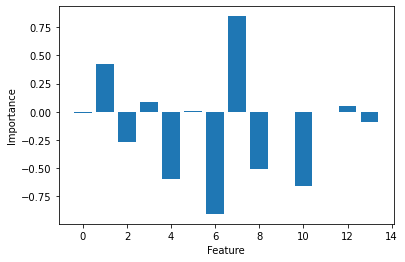

In [62]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Load the dataframe
df = pd.read_csv('Features_Smote.csv')

# Split the dataframe into features and target
X = df_smote.drop(df_smote.columns[-1], axis=1)
y= df_smote.iloc[:,-1]
# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the feature importances
feature_importances = model.coef_

# Print the feature importances
print(feature_importances)
num_columns =df_smote.shape[1]
Coeff=[]
num=[]
for i in range(num_columns-1):
    Coeff.append(feature_importances[0][i])
    num.append(i)
import matplotlib.pyplot as plt
# Plot the feature importances
plt.bar(num,Coeff)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()    

Kneighbors Classifier

Feature: 0, Score: 0.04071
Feature: 1, Score: 0.14602
Feature: 2, Score: -0.00265
Feature: 3, Score: 0.00000
Feature: 4, Score: -0.00442
Feature: 5, Score: 0.00000
Feature: 6, Score: -0.00088
Feature: 7, Score: 0.00000
Feature: 8, Score: -0.00442
Feature: 9, Score: 0.00000
Feature: 10, Score: -0.00265
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.05575
Feature: 13, Score: 0.06814


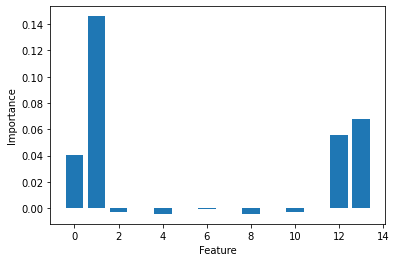

In [66]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

# Load the DataFrame
df = pd.read_csv('Features_Smote.csv')

# Split the DataFrame into features and target
X = df_smote.drop(df_smote.columns[-1], axis=1)
y= df_smote.iloc[:,-1]
# Create a KNeighborsClassifier model
model = KNeighborsClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the feature importances
results = permutation_importance(model, X, y, scoring='accuracy')
importance = results.importances_mean

# Print the feature importances
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# Plot the feature importances
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


RandomForest

Feature: 0, Score: -0.00354
Feature: 1, Score: 0.00531
Feature: 2, Score: 0.00177
Feature: 3, Score: 0.00708
Feature: 4, Score: 0.00265
Feature: 5, Score: -0.00265
Feature: 6, Score: 0.00619
Feature: 7, Score: 0.00265
Feature: 8, Score: 0.00177
Feature: 9, Score: -0.00531
Feature: 10, Score: 0.00088
Feature: 11, Score: -0.00265
Feature: 12, Score: 0.00885
Feature: 13, Score: 0.00354


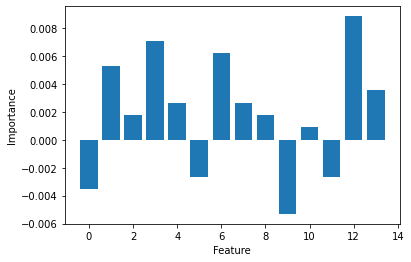

In [67]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# Load the DataFrame
df = pd.read_csv('Features_Smote.csv')

# Split the DataFrame into features and target
X = df_smote.drop(df_smote.columns[-1], axis=1)
y= df_smote.iloc[:,-1]

# Create a RandomForestClassifier model
model = RandomForestClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the feature importances
results = permutation_importance(model, X, y, scoring='accuracy')
importance = results.importances_mean

# Print the feature importances
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# Plot the feature importances
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()
